In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
store = pd.read_csv('stores.csv')
feature = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
merged_test = test.merge(store, how='left').merge(feature, how='left')
merged_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [ ]:
merged_train = train.merge(store, how='left').merge(feature, how='left')
merged_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


### EDA

In [ ]:
merged_train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [ ]:
merged_train['Dept'].value_counts()


1     6435
13    6435
2     6435
46    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [ ]:
merged_train['Store'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [ ]:
merged_train.shape

(421570, 16)

In [ ]:
merged_test = merged_test.drop(columns=['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
merged_test.shape

(115064, 10)

In [ ]:
merged_train = merged_train.drop(columns=['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5','Date'])
merged_train.shape

(421570, 10)

In [ ]:
#merged_train.to_csv('Mtrain.csv')

In [ ]:
#merged_test.to_csv('Mtest.csv')

In [ ]:
fig, ax = plt.subplots(ncols = 2,nrows = 2, figsize=(15, 10))
h1 = sns.scatterplot(data = merged_train, x = 'Unemployment', y='CPI', hue = 'Type', ax=ax[0,0])
h1.set_title('CPI vs. Unemployment by Type')

g2 = sns.scatterplot(data = merged_train, x = 'Fuel_Price', y='CPI', hue = 'Type', ax=ax[0,1])
g2.set_title('CPI vs. Fuel price by Type')

g3 = sns.scatterplot(data = merged_train, x = 'Temperature', y='CPI',hue = 'Type', ax=ax[1,0])
g3.set_title('CPI vs. Temperature by Type')

g4 = sns.barplot(data = merged_train, x = 'Store', y='CPI', ax=ax[1,1])
g4.set_title('CPI by store')
plt.show()

KeyboardInterrupt: 

In [ ]:
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(merged_train.corr(), cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

NameError: name 'plt' is not defined

In [ ]:
merged_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


In [ ]:
merged_train1 = merged_train.drop(columns=['Store','Dept','Date','Type','IsHoliday'])
merged_train1.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
0,24924.50,151315,42.31,2.572,211.096358,8.106
1,46039.49,151315,38.51,2.548,211.242170,8.106
2,41595.55,151315,39.93,2.514,211.289143,8.106
3,19403.54,151315,46.63,2.561,211.319643,8.106
4,21827.90,151315,46.50,2.625,211.350143,8.106


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
merged_train_scaled = pd.DataFrame(sc.fit_transform(merged_train1), columns=merged_train1.columns)
merged_train_scaled.head()

NameError: name 'merged_train1' is not defined

In [ ]:
cat_col=['Store','Dept','Date','Type','IsHoliday']
for i in range(5):
    merged_train_scaled[cat_col[i]] = merged_train[cat_col[i]].tolist() 
merged_train_scaled

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Store,Dept,Date,Type,IsHoliday
0,0.393782,0.239209,-0.963798,-1.720834,1.018774,0.078201,1,1,2010-02-05,A,False
1,1.323501,0.239209,-1.169783,-1.773177,1.022498,0.078201,1,1,2010-02-12,A,True
2,1.127829,0.239209,-1.092810,-1.847330,1.023697,0.078201,1,1,2010-02-19,A,False
3,0.150687,0.239209,-0.729625,-1.744825,1.024476,0.078201,1,1,2010-02-26,A,False
4,0.257435,0.239209,-0.736672,-1.605243,1.025255,0.078201,1,1,2010-03-05,A,False
...,...,...,...,...,...,...,...,...,...,...,...
421565,-0.681290,-0.303489,0.259647,1.387032,0.531461,0.388404,45,98,2012-09-28,B,False
421566,-0.676018,-0.303489,0.260189,1.360860,0.535467,0.379281,45,98,2012-10-05,B,False
421567,-0.656956,-0.303489,-0.304645,1.393575,0.539472,0.379281,45,98,2012-10-12,B,False
421568,-0.670210,-0.303489,-0.196231,1.325965,0.539564,0.379281,45,98,2012-10-19,B,False


In [ ]:
merged_train_scaled.to_csv('Mtrain scaled.csv')

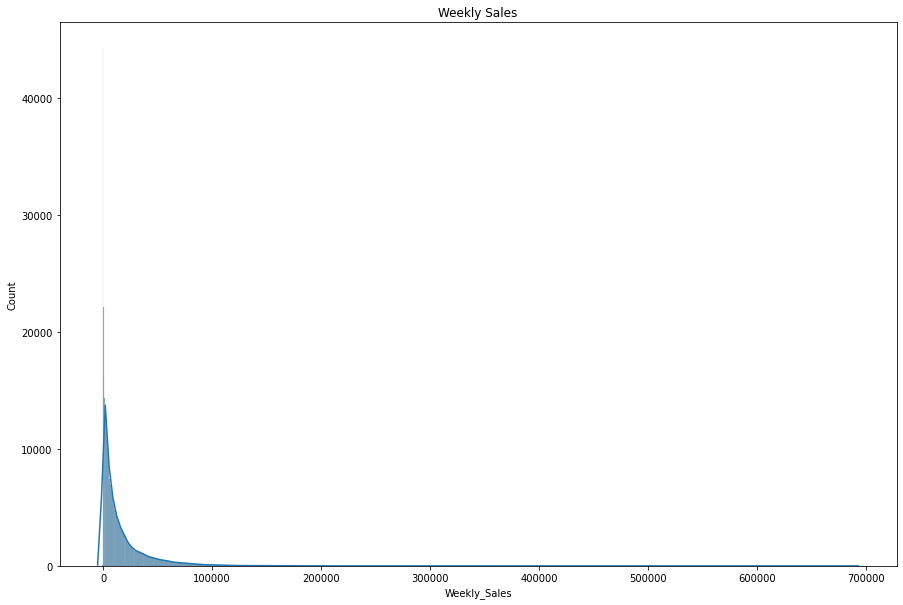

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(merged_train['Weekly_Sales'],kde=True)
plt.title("Weekly Sales")
plt.show()

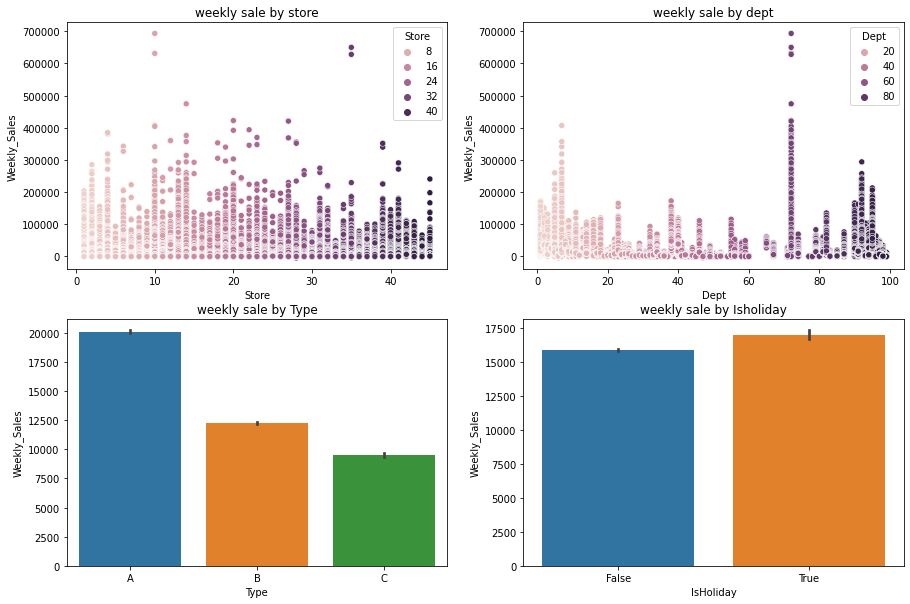

In [ ]:
fig, ax = plt.subplots(ncols = 2,nrows = 2, figsize=(15, 10))
g1 = sns.scatterplot(data = merged_train, x = 'Store', y='Weekly_Sales', hue = 'Store', ax=ax[0,0])
g1.set_title('weekly sale by store')

g2 = sns.scatterplot(data = merged_train, x = 'Dept', y='Weekly_Sales', hue = 'Dept', ax=ax[0,1])
g2.set_title('weekly sale by dept')

g3 = sns.barplot(data = merged_train, x = 'Type', y='Weekly_Sales', ax=ax[1,0])
g3.set_title('weekly sale by Type')

g4 = sns.barplot(data = merged_train, x = 'IsHoliday', y='Weekly_Sales', ax=ax[1,1])
g4.set_title('weekly sale by Isholiday')
plt.show()

Text(0.5, 1.0, 'weekly sale vs. Temp by Isholiday')

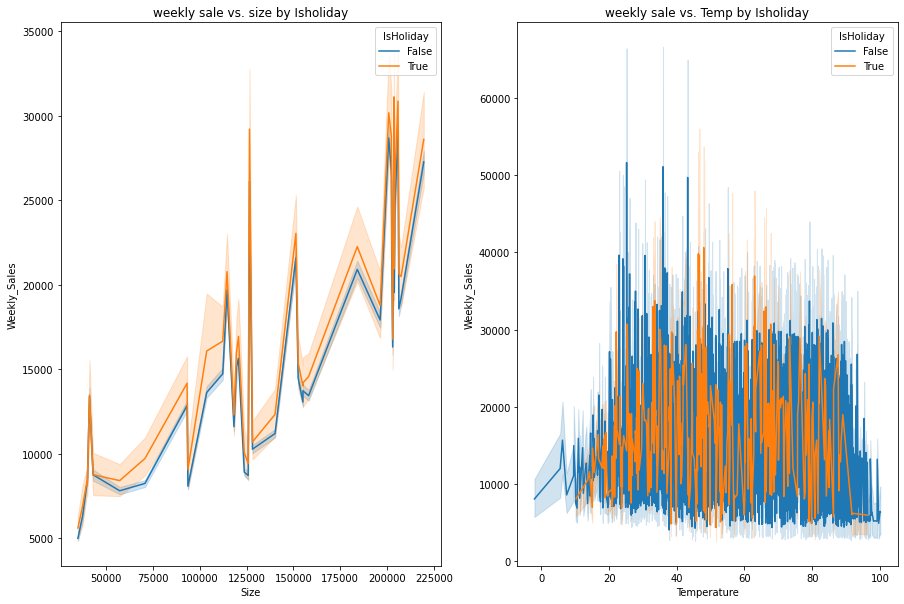

In [ ]:
fig, ax = plt.subplots(ncols = 2,nrows = 1, figsize=(15, 10))
f1 = sns.lineplot(data = merged_train, x = 'Size', y='Weekly_Sales', hue = 'IsHoliday', ax=ax[0])
f1.set_title('weekly sale vs. size by Isholiday')

f1 = sns.lineplot(data = merged_train, x = 'Temperature', y='Weekly_Sales', hue = 'IsHoliday', ax=ax[1])
f1.set_title('weekly sale vs. Temp by Isholiday')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=44fb392e-d929-4e4f-86c2-2177089827cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>